In [1]:
import pickle
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fname_1 = r'\vx1.pkl'
fname_2 = r'\spx1.pkl'

filepath_1 = os.getcwd() + r'\Data' + fname_1
filepath_2 = os.getcwd() + r'\Data' + fname_2

vx1 = pickle.load(open(filepath_1, "rb"))
spx1 = pickle.load(open(filepath_2, "rb"))

#print(filepath_1)
#print(filepath_2)

In [3]:
print(type(vx1))
print(type(spx1))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
vx1.shape, spx1.shape

((3142, 9), (2626, 6))

In [5]:
vx1.head()

,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
Trade Date,,,,,,,,,
2005-06-20,14.83,14.83,14.83,14.83,14.83,14.83,0.0,0.0,0.0
2005-06-21,14.90,14.90,14.90,14.90,14.91,0.08,50.0,0.0,50.0
2005-06-22,14.84,14.84,14.84,14.84,14.86,-0.05,10.0,0.0,60.0
2005-06-23,14.98,15.05,14.91,15.05,15.12,0.26,61.0,0.0,121.0
2005-06-24,15.09,15.20,15.05,15.20,15.27,0.15,9.0,0.0,117.0


In [6]:
vx1.loc['2006-01-03']

Open                        12.34
High                        12.46
Low                         12.03
Close                       12.03
Settle                      12.02
Change                      -0.43
Total Volume               125.00
EFP                          0.00
Prev. Day Open Interest    452.00
Name: 2006-01-03 00:00:00, dtype: float64

In [7]:
spx1.index.names = ['Date']
vx1.index.names = ['Date']

In [8]:
spx1.head()

,Strike1,Strike2,Option1,Option2,t1,t2
Date,,,,,,
2005-10-03,1230.0,1230.0,0.106445,0.113757,14.0,34.0
2005-10-04,1215.0,1220.0,0.119392,0.120574,13.0,33.0
2005-10-05,1200.0,1200.0,0.136211,0.133042,12.0,32.0
2005-10-06,1195.0,1200.0,0.143999,0.133893,11.0,31.0
2005-10-07,1195.0,1200.0,0.140486,0.132000,10.0,30.0


In [9]:
#vx1_test = lambda x: vx1[vx1.index[x] >= spx1.index[0] & vx1.index[x] <= spx1.index[-1]]

In [10]:
print(type(vx1.index), type(spx1.index[0]))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'> <class 'pandas._libs.tslib.Timestamp'>


In [11]:
eod = spx1.merge(vx1.iloc[:,[3,4]], left_index=True, right_index=True)
eod.head()

,Strike1,Strike2,Option1,Option2,t1,t2,Close,Settle
Date,,,,,,,,
2005-10-03,1230.0,1230.0,0.106445,0.113757,14.0,34.0,12.76,12.86
2005-10-04,1215.0,1220.0,0.119392,0.120574,13.0,33.0,13.19,13.18
2005-10-05,1200.0,1200.0,0.136211,0.133042,12.0,32.0,13.86,13.80
2005-10-06,1195.0,1200.0,0.143999,0.133893,11.0,31.0,14.15,14.10
2005-10-07,1195.0,1200.0,0.140486,0.132000,10.0,30.0,14.11,14.05


In [12]:
eod['OPT'] = 100*(np.sqrt((eod['Option2']**2 *eod['t2']/252 - eod['Option1']**2 *eod['t1']/252) /\
            (eod['t2']/252 - eod['t1']/252)))

In [13]:
eod.head()

,Strike1,Strike2,Option1,Option2,t1,t2,Close,Settle,OPT
Date,,,,,,,,,
2005-10-03,1230.0,1230.0,0.106445,0.113757,14.0,34.0,12.76,12.86,11.860636
2005-10-04,1215.0,1220.0,0.119392,0.120574,13.0,33.0,13.19,13.18,12.133531
2005-10-05,1200.0,1200.0,0.136211,0.133042,12.0,32.0,13.86,13.80,13.110415
2005-10-06,1195.0,1200.0,0.143999,0.133893,11.0,31.0,14.15,14.10,12.799534
2005-10-07,1195.0,1200.0,0.140486,0.132000,10.0,30.0,14.11,14.05,12.754623


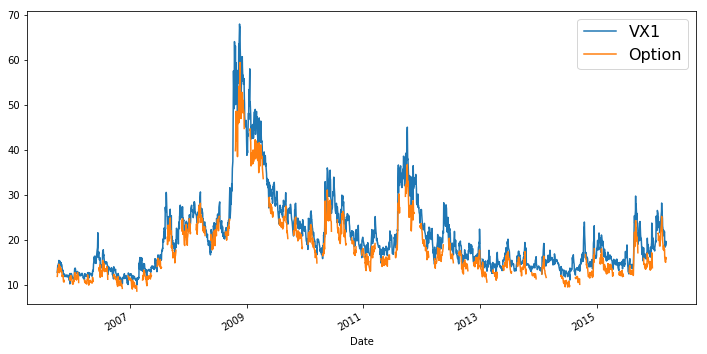

In [16]:
eod[['Close','OPT']].plot(figsize=(12,6))
plt.legend(prop={'size': 16},labels=('VX1', 'Option'))

In [17]:
eod['VX1-OPT_Spread'] = eod['Close'] - eod['OPT']
eod[['VX1-OPT_Spread']].describe()

,VX1-OPT_Spread
count,1550.000000
mean,2.601482
std,1.783427
min,-3.977454
25%,1.617118
50%,2.213536
75%,3.066138
max,23.262420


In [18]:
belowzero = eod['VX1-OPT_Spread'] < 0
print(belowzero.sum())    # Absolute number of inverted closes (Options > VIX fut at close)
print(belowzero.mean())   # Pct of inverted closes w.r.t. total closes (Options > VIX fut at close)

28
0.010662604722


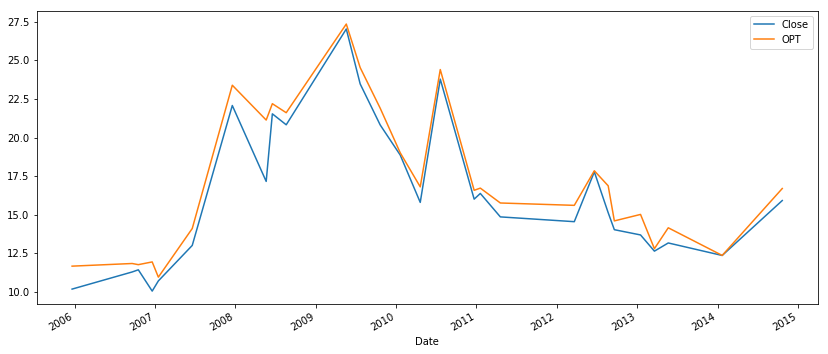

In [19]:
eod[belowzero][['Close','OPT']].plot(figsize=(14,6))
#plt.figure(figsize=(14,6))

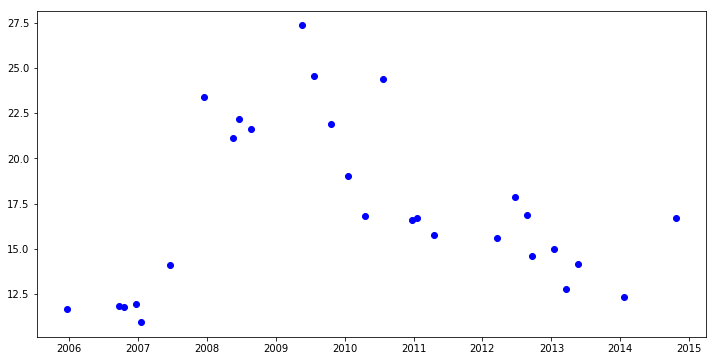

In [20]:
plt.figure(figsize=(12,6))
plt.plot(eod[belowzero][['OPT']], 'bo')

In [21]:
eod[belowzero][['OPT']].tail()

,OPT
Date,
2013-01-16,15.019794
2013-03-20,12.799285
2013-05-22,14.153389
2014-01-22,12.362177
2014-10-22,16.699716


In [22]:
eod[belowzero][['OPT']].describe()

,OPT
count,28.000000
mean,17.131729
std,4.584735
min,10.954613
25%,13.779549
50%,16.641437
75%,21.256416
max,27.360114


In [23]:
eod[belowzero][['OPT', 'VX1-OPT_Spread']].describe()

,OPT,VX1-OPT_Spread
count,28.000000,28.000000
mean,17.131729,-0.896015
std,4.584735,0.782200
min,10.954613,-3.977454
25%,13.779549,-1.088583
50%,16.641437,-0.781509
75%,21.256416,-0.342609
max,27.360114,-0.002177


## Process Intraday Data

In [2]:
#fname_3 = r'\vix_intra(original).pkl'
fname_3 = r'\vix_intra.pkl'
fname_4 = r'\spx_intra_options.pkl'

filepath_3 = os.getcwd() + r'\Data\Intraday\Pickle' + fname_3
filepath_4 = os.getcwd() + r'\Data\Intraday\Pickle' + fname_4

vix_intra = pickle.load(open(filepath_3, "rb"))
spx_intra = pickle.load(open(filepath_4, "rb"))

In [3]:
vix_intra.head()

,SYMBOL,UPRICE_BID,UPRICE_ASK,FWD_PRICE
TIMESTAMP,,,,
2015-01-02 09:30:00,VIX 150121P00014000,0.00,0.00,0.000
2015-01-02 09:40:00,VIX 150121P00014000,17.15,17.20,17.175
2015-01-02 09:50:00,VIX 150121P00014000,17.25,17.30,17.275
2015-01-02 10:00:00,VIX 150121P00014000,17.35,17.40,17.375
2015-01-02 10:10:00,VIX 150121P00014000,17.70,17.75,17.725


In [4]:
vix_intra.shape

(19840, 4)

In [5]:
spx_intra.head()

,Strike1,Strike2,Option1,Option2,t1,t2
date,,,,,,
2015-01-02 09:40:00,2070.0,2070.0,0.132620,0.136980,11.993056,32.993056
2015-01-02 09:50:00,2070.0,2070.0,0.132455,0.136215,11.986111,32.986111
2015-01-02 10:00:00,2070.0,2065.0,0.134345,0.138615,11.979167,32.979167
2015-01-02 10:10:00,2065.0,2060.0,0.139675,0.143980,11.972222,32.972222
2015-01-02 10:20:00,2065.0,2060.0,0.140710,0.144930,11.965278,32.965278


In [6]:
spx_intra.shape

(19656, 6)

#### Workaround for NaNs ('isnull') in dataset -> 2015-10-21:2015-11-18

In [7]:
spx_intra.iloc[:,1].isnull().sum()

0

In [8]:
spx_intra = spx_intra[~spx_intra.iloc[:,0].isnull()]

In [9]:
# ONLY USE WITH VIX FUTURES DATA IMPORTED FROM 'vix_intra(original).pkl' FILE
#opt_fut = spx_intra.merge(vix_intra.iloc[:,4].to_frame(), left_index=True, right_index=True)

# ONLY USE WITH VIX FUTURES DATA IMPORTED FROM 'vix_intra.pkl' FILE
opt_fut = spx_intra.merge(vix_intra.iloc[:,3].to_frame(), left_index=True, right_index=True)
opt_fut.tail(20)

,Strike1,Strike2,Option1,Option2,t1,t2,FWD_PRICE
2016-12-30 12:50:00,2245.0,2240.0,0.111230,0.122570,11.861111,33.861111,15.075
2016-12-30 13:00:00,2240.0,2240.0,0.114810,0.123310,11.854167,33.854167,15.125
2016-12-30 13:10:00,2240.0,2240.0,0.114665,0.122280,11.847222,33.847222,15.125
2016-12-30 13:20:00,2245.0,2240.0,0.111690,0.122895,11.840278,33.840278,15.075
2016-12-30 13:30:00,2245.0,2240.0,0.111410,0.122155,11.833333,33.833333,15.075
2016-12-30 13:40:00,2245.0,2240.0,0.110880,0.122315,11.826389,33.826389,15.075
2016-12-30 13:50:00,2240.0,2240.0,0.113220,0.122830,11.819444,33.819444,15.075
2016-12-30 14:00:00,2240.0,2240.0,0.113545,0.122530,11.812500,33.812500,15.175
2016-12-30 14:10:00,2240.0,2240.0,0.114400,0.122690,11.805556,33.805556,15.175
2016-12-30 14:20:00,2240.0,2240.0,0.114060,0.122695,11.798611,33.798611,15.225


In [10]:
a = (opt_fut['Option2']**2 *opt_fut['t2']/252 - opt_fut['Option1']**2 *opt_fut['t1']/252)
opt_fut[a<0]

,Strike1,Strike2,Option1,Option2,t1,t2,FWD_PRICE
2015-08-24 09:50:00,1900.0,1900.0,0.52462,0.328725,15.986111,37.986111,24.675


In [11]:
# Screen for occurrences where 1st implied vol is trading at a sharply higher level than the 2nd implied vol
inside = (opt_fut['Option2']**2 *opt_fut['t2']/252 - opt_fut['Option1']**2 *opt_fut['t1']/252)

# Remove instances where the time-weighted implied variance of Term 1 > time-weighted implied variance of Term 2
# ie, cases where subtracting the first term from the second produces a negative value
opt_fut = opt_fut[inside > 0]

In [12]:
opt_fut['OPT'] = 100*(np.sqrt((opt_fut['Option2']**2 *opt_fut['t2']/252 - opt_fut['Option1']**2 *opt_fut['t1']/252) /\
            (opt_fut['t2']/252 - opt_fut['t1']/252)))

In [13]:
opt_fut['VX1-OPT_Spread'] = opt_fut['FWD_PRICE'] - opt_fut['OPT']
opt_fut['VX1-OPT_Spread'].describe()

count    19343.000000
mean         2.670167
std          0.652358
min         -1.573733
25%          2.210658
50%          2.610002
75%          3.084910
max          5.364095
Name: VX1-OPT_Spread, dtype: float64

In [14]:
opt_fut.index.dtype

dtype('<M8[ns]')

In [15]:
opt_fut.head()

,Strike1,Strike2,Option1,Option2,t1,t2,FWD_PRICE,OPT,VX1-OPT_Spread
2015-01-02 09:40:00,2070.0,2070.0,0.132620,0.136980,11.993056,32.993056,17.175,13.940883,3.234117
2015-01-02 09:50:00,2070.0,2070.0,0.132455,0.136215,11.986111,32.986111,17.275,13.831527,3.443473
2015-01-02 10:00:00,2070.0,2065.0,0.134345,0.138615,11.979167,32.979167,17.375,14.099285,3.275715
2015-01-02 10:10:00,2065.0,2060.0,0.139675,0.143980,11.972222,32.972222,17.725,14.637765,3.087235
2015-01-02 10:20:00,2065.0,2060.0,0.140710,0.144930,11.965278,32.965278,17.725,14.728039,2.996961


#### Pickle Baseline Time Series dataframe

In [16]:
opt_fut.to_pickle(os.getcwd() + r'\Data\Intraday\Pickle\vx1_opt.pkl')

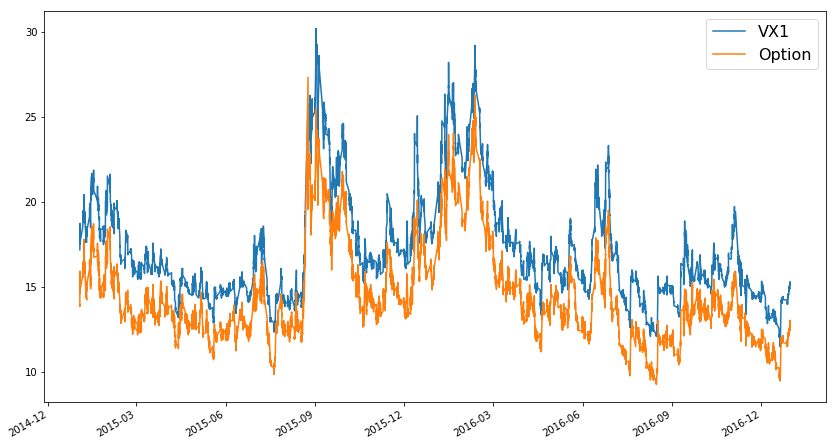

In [18]:
opt_fut[:'2016-12-30'][['FWD_PRICE','OPT']].plot(figsize=(14,8))
plt.legend(prop={'size': 16},labels=('VX1', 'Option'))

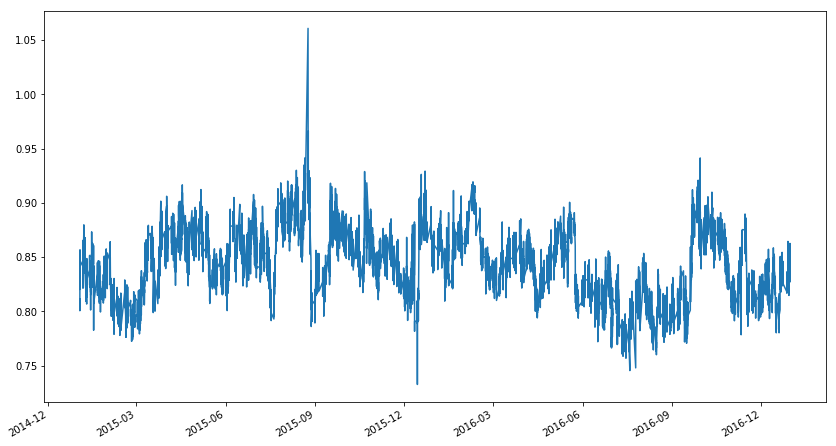

In [14]:
spread = opt_fut['Mid'] - opt_fut['OPT']
ratio = opt_fut['OPT']/opt_fut['Mid']

#spread[:'2016-12-30'].plot(figsize=(14,8))
ratio[:'2016-12-30'].plot(figsize=(14,8))

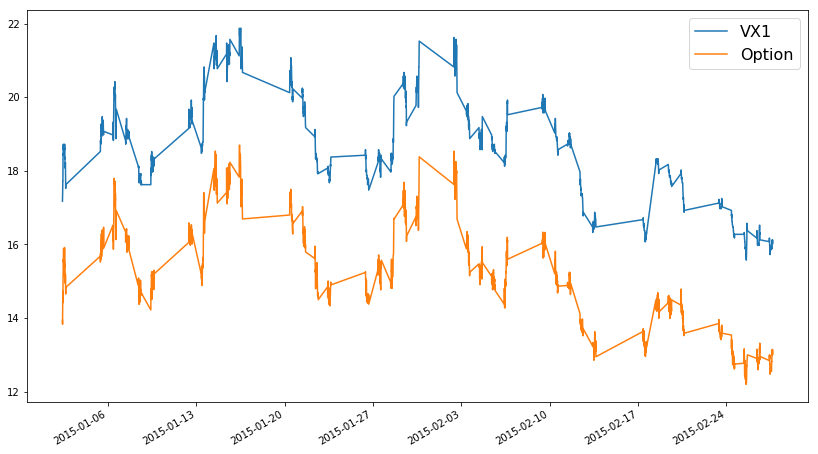

In [72]:
opt_fut['2015-1-2':'2015-02-27'][['Mid','OPT']].plot(figsize=(14,8))
plt.legend(prop={'size': 16},labels=('VX1', 'Option'))

In [74]:
#opt_fut['2015-1-21':'2015-1-22']

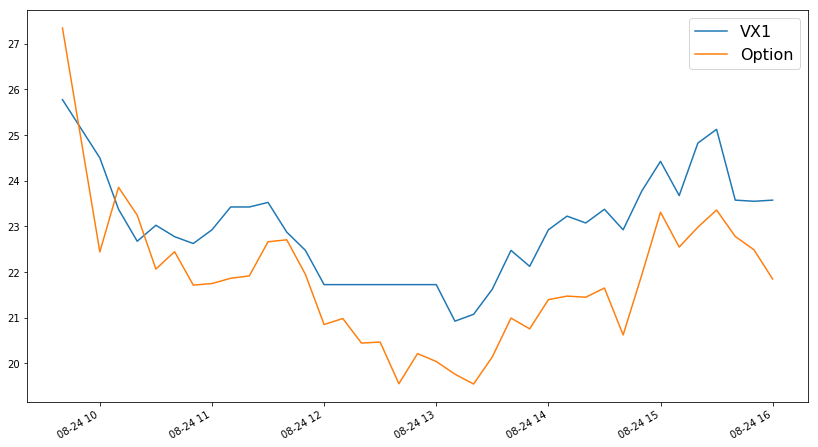

In [80]:
#opt_fut['2015-08-21':'2015-8-25'][['Mid','OPT']].plot(figsize=(14,8))
opt_fut['2015-08-24'][['Mid','OPT']].plot(figsize=(14,8))
plt.legend(prop={'size': 16},labels=('VX1', 'Option'))